In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [3]:
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 4d473c1dd8becc155b73f8504c6f6626 so we will re-download the data.
94773248/94765736 [==============================] - 25s 0us/step


In [4]:


# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False



In [5]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:


# view the structure of the model
model.summary()



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:


# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)



In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [16]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
2/2 [==============================] - 12s 6s/step - loss: 0.6013 - accuracy: 0.7656 - val_loss: 0.9207 - val_accuracy: 0.6724
Epoch 2/30
2/2 [==============================] - 18s 9s/step - loss: 0.7428 - accuracy: 0.6406 - val_loss: 1.1290 - val_accuracy: 0.7069
Epoch 3/30
2/2 [==============================] - 16s 8s/step - loss: 0.6199 - accuracy: 0.7344 - val_loss: 0.8211 - val_accuracy: 0.6897
Epoch 4/30
2/2 [==============================] - 15s 8s/step - loss: 0.6562 - accuracy: 0.7188 - val_loss: 0.7453 - val_accuracy: 0.7069
Epoch 5/30
2/2 [==============================] - 16s 8s/step - loss: 0.6350 - accuracy: 0.7031 - val_loss: 0.9449 - val_accuracy: 0.6552
Epoch 6/30
2/2 [==============================] - 16s 8s/step - loss: 0.5987 - accuracy: 0.7188 - val_loss: 0.7923 - val_accuracy: 0.6724
Epoch 7/30
2/2 [==============================] - 16s 8s/step - loss: 0.6287 - accuracy: 0.6875 - val_loss: 0.9200 - val_accuracy: 0.6724
Epoch 8/30
2/2 [==================

In [19]:
r.history

{'loss': [0.6013087630271912,
  0.742760419845581,
  0.6199110746383667,
  0.6562052965164185,
  0.6350141167640686,
  0.5987499952316284,
  0.6286940574645996,
  0.6321203112602234,
  0.606459379196167,
  0.4347482919692993,
  0.5283972024917603,
  0.5090106129646301,
  0.3564092516899109,
  0.5175300240516663,
  0.4371533691883087,
  0.3854381740093231,
  0.46365082263946533,
  0.39802420139312744,
  0.4435024857521057,
  0.4405478239059448,
  0.39942821860313416,
  0.4312897324562073,
  0.3741213083267212,
  0.5291076898574829,
  0.4824240207672119,
  0.35881686210632324,
  0.3799249827861786,
  0.3717097043991089,
  0.3191593885421753,
  0.2938452661037445],
 'accuracy': [0.765625,
  0.640625,
  0.734375,
  0.71875,
  0.703125,
  0.71875,
  0.6875,
  0.6875,
  0.703125,
  0.875,
  0.765625,
  0.78125,
  0.890625,
  0.78125,
  0.8125,
  0.828125,
  0.734375,
  0.875,
  0.8125,
  0.78125,
  0.828125,
  0.828125,
  0.8125,
  0.734375,
  0.75,
  0.875,
  0.8125,
  0.796875,
  0.90625,


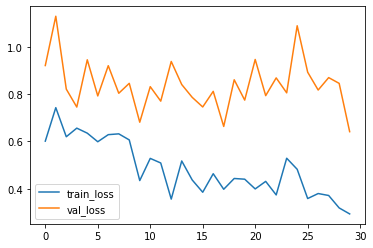

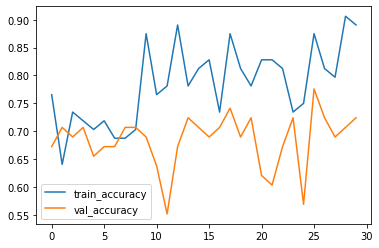

<Figure size 432x288 with 0 Axes>

In [20]:
#plot the loss
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('Loss Vs Val_loss')

#plot the accuracy
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()
plt.savefig('accuracy Vs Val_accuracy')

In [ ]:
y_pred=model.predict(test_set)